In [ ]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
pathh = 'MNISTClassifier'

for parent, dirs, files in os.walk(pathh, topdown=False):
  for file in files:
    file_path = os.path.join(parent, file)
    os.remove(file_path)
  for dir in dirs:
    dir_path = os.path.join(parent, dir)
    os.rmdir(dir_path)
  
  os.rmdir('/content/MNISTClassifier')

In [ ]:
(images, labels), (test_images, test_labels) = mnist.load_data() 
images = images.reshape((60000, 28, 28)).astype("float32") / 255
images = np.expand_dims(images, axis=3)
test_images = test_images.reshape((10000, 28, 28)).astype("float32") / 255
test_images = np.expand_dims(test_images, axis=3)
x_train, x_test = images[10000:], images[:10000]
y_train, y_test = labels[10000:], labels[:10000]

Inspect data

2


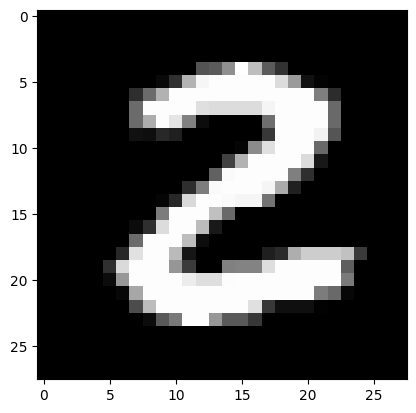

In [ ]:
x_test[5].shape
digit = x_test[25]
fig = plt.figure
plt.imshow(digit, cmap='gray')
print(y_test[16])

# number 2 are found in these location: [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2)]

In [ ]:
few_twos = []
count = 0
for index, label in enumerate(y_test):
  if count > 4:
    break
  if label == 5:
    few_twos.append((index, label))
    count += 1

print(few_twos)

[(0, 5), (11, 5), (35, 5), (47, 5), (65, 5)]


In [ ]:
print(few_twos)

[(0, 5), (11, 5), (35, 5), (47, 5), (65, 5)]


In [ ]:
class MNISTClassifier(tf.keras.Model):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        
        # Define the layers
        #for feature extration
        self.conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))
        self.max_pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')
        self.max_pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dropout1 = tf.keras.layers.Dropout(0.25)
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(10)
        self.layers_list = [self.conv1, self.max_pool1, self.conv2, self.max_pool2,
                           self.flatten, self.dropout1, self.dense1, self.dropout2, self.dense2]
    @tf.function
    def call(self, *args, **kwargs):
        # Define the forward pass
        # output is the model logits
        activation_list = []
        out = args[0]
        for layer in self.layers_list:                  
           out = layer(out)
           activation_list.append(out)

        if kwargs['training']:
          #notice that training is a kw argument checked when fit is called
          #so when model is training, all I need is the output logits to call the loss function upon
          return out
        else:          
          prob = tf.nn.softmax(out)
          return out, prob

In [ ]:
class SaveFinalTrainingLogitsProp(keras.callbacks.Callback):
  def on_train_end(self, logs):
    self.out = model.predict(x_train)
    self.prob = tf.nn.softmax(self.out)
    print(self.out.shape, self.prob.shape)


In [ ]:
model = MNISTClassifier()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

model.save('MNISTClassifier')
# model = keras.models.load_model("MNISTClassifier.keras")

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 0.2456 - accuracy: 0.9251 - val_loss: 0.0693 - val_accuracy: 0.9792
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0907 - accuracy: 0.9725 - val_loss: 0.0629 - val_accuracy: 0.9810
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0687 - accuracy: 0.9799 - val_loss: 0.0466 - val_accuracy: 0.9865
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0561 - accuracy: 0.9828 - val_loss: 0.0346 - val_accuracy: 0.9899
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0420 - val_accuracy: 0.9885
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0322 - val_accura

## load model and make predictions

In [ ]:
# select a few twos from the test dataset and reshape
# twos are at [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2)]

twos_tuple = [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2)]
reshaped_sample_twos = []
for tup in twos_tuple:
  a_two = x_test[tup[0]]
  a_two = np.reshape(a_two, (-1, 28, 28, 1))
  reshaped_sample_twos.append(a_two)
reshaped_sample_twos = np.array(reshaped_sample_twos)
# a_five = np.reshape(x_test[47], (-1, 28, 28, 1))
# print(a_five.shape)

In [ ]:
print(reshaped_sample_twos.shape) #the network expects a rank 4 tensor ie. batch, width, hieght, channel

(5, 1, 28, 28, 1)


In [ ]:
# location of 2 in x_test # number 2 are found in these location: [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2)]
model = tf.keras.models.load_model('MNISTClassifier')

prediction = []
for sample in reshaped_sample_twos:
  sample_prediction = model.predict(sample)
  prediction.append(sample_prediction)
# print(np.argmax(prediction))
print(np.argmax(prediction[0][1]))

1/1 [==============================] - 0s 17ms/step
2


In [ ]:
print(tf.one_hot(y_test[5], 10)) #creates a 0n-hot encoded output label to enable us calculate the distance

tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


In [ ]:
reshaped_sample_twos[0].shape
#squeze to drop first dim
squeze_two = np.expand_dims(np.squeeze(reshaped_sample_twos[2]), axis=2)
squeze_two.shape
x = squeze_two
x = np.expand_dims(x, axis=0)
x = tf.convert_to_tensor(x)
y = y_test[5]
y = tf.convert_to_tensor(y)

print(y)
print(x.shape)

tf.Tensor(2, shape=(), dtype=uint8)
(1, 28, 28, 1)


In [ ]:
# def fgsm_attack(model, loss_object, x, y, epsilon):
#   # tensor of same shape as x to hold perturbation
#   #x coming in is already perturbed version of x
#   delta = tf.zeros_like(x)
#   y = tf.one_hot(y, 10)

#   with tf.GradientTape() as tape:
#     tape.watch(x)
#     prediction = model(x)
#     # since training = False here, it will return out, prob
#     loss = (y, prediction[0])
#     # print(loss)
  
#   # compute gradient of loss wrt input
#   gradients = tape.gradient(loss, x)
  

#   #normalize the gradient vector by dividing all values by the std
#   gradients /= tf.math.reduce_std(gradients) + 1e-8

#   # Add a small perturbation to the input using the sign of the gradients
#   x_perturbed = x + epsilon * tf.sign(gradients)

#   # add perturbation to input using the sign of the gradient

#   x_perturbed = tf.clip_by_value((x_perturbed, 0, 1))

#   return x_perturbed

In [ ]:
# x_perturbed = fgsm_attack(model, tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), x, y, 0.1)

TypeError: ignored

In [ ]:
def fgsm(model, x, y, eps):
  # tensor of same shape as x to hold perturbation
  #x coming in is already perturbed version of x
  # delta = tf.zeros_like(x)
  y = tf.one_hot(y, 10)
  y = np.reshape(y, (1,10))

  x = tf.cast(x, tf.float32)
  with tf.GradientTape() as tape:
      tape.watch(x)
      y_pred = model(x)
      y_pred = y_pred[1]
      loss = tf.keras.losses.categorical_crossentropy(y, y_pred, from_logits=True)
  gradient = tape.gradient(loss, x)
  gradient /= tf.math.reduce_std(gradient) + 1e-8
  signed_grad = tf.sign(gradient)
  perturbation = eps*signed_grad
  adv_x = x + perturbation
  adv_x = tf.clip_by_value(adv_x, 0, 1) # make sure the perturbed image is still in [0, 1] range
  return adv_x, perturbation

In [ ]:
x_test_adv, perturbation = fgsm(model, x, y, 0.11)

(28, 28, 1)


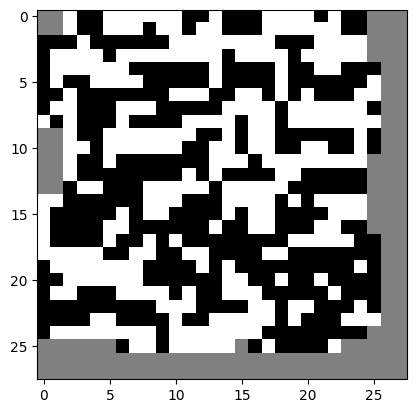

In [ ]:
# x_test[5].shape
# digit = x_test[16]
# fig = plt.figure
# plt.imshow(digit, cmap='gray')
# print(y_test[16])

perturbation = np.squeeze(perturbation)
perturbation = np.expand_dims(perturbation, axis=2)
print(perturbation.shape)

plt.imshow(perturbation, cmap='gray')

(28, 28, 1)


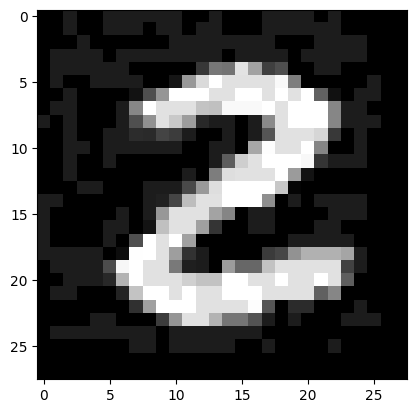

In [ ]:
adv_image = np.squeeze(x_test_adv)
adv_image = np.expand_dims(adv_image, axis=2)
print(adv_image.shape)

plt.imshow(adv_image, cmap='gray')

In [ ]:
adv_pred = model.predict(x_test_adv)

print(np.argmax(adv_pred[1]))

1/1 [==============================] - 0s 26ms/step
2
